# Desafio DS - Lighthouse - P02

## 1. Understanding how to work

### 1.1 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing

### 1.2 Describing the file

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 10)

df_original = pd.read_csv("df_final_with_no_na_values.csv",index_col='Year', parse_dates=True)
df_original.index.name = None
df_original.head()

,ASEAN-5,Advanced economies,Afghanistan,Africa (Region),Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Asia and Pacific,Australia,Australia and New Zealand,Austria,Azerbaijan,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Caribbean,Central African Republic,Central America,Central Asia and the Caucasus,Chad,Chile,China,Colombia,Comoros,Costa Rica,Croatia,Cyprus,Czech Republic,Côte d'Ivoire,Dem. Rep. of the Congo,Denmark,Djibouti,Dominica,Dominican Republic,East Asia,Eastern Europe,Ecuador,Egypt,El Salvador,Emerging and Developing Asia,Emerging and Developing Europe,Emerging market and developing economies,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Euro area,Europe,European Union,Fed. States of Micronesia,Fiji,Finland,France,Gabon,Georgia,Germany,Ghana,Greece,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hong Kong SAR,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Kosovo,Kuwait,Kyrgyz Republic,Lao P.D.R.,Latin America and the Caribbean,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Luxembourg,Macao SAR,Madagascar,Major advanced economies (G7),Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Mauritania,Mauritius,Mexico,Middle East (Region),Middle East and Central Asia,Moldova,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Africa,North America,North Macedonia,Norway,Oman,Other advanced economies,Pacific Islands,Pakistan,Palau,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Republic of Congo,Republic of Korea,Republic of South Sudan,Republic of Turkiye,Romania,Russian Federation,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,Samoa,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovak Republic,Slovenia,Solomon Islands,Somalia,South Africa,South America,South Asia,Southeast Asia,Spain,Sri Lanka,Sub-Saharan Africa,Sub-Saharan Africa (Region),Sudan,Suriname,Sweden,Switzerland,Syria,São Tomé and Príncipe,Taiwan Province of China,Tajikistan,Tanzania,Thailand,The Bahamas,The Gambia,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkmenistan,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Western Europe,Western Hemisphere (Region),World,Yemen,Zambia,Zimbabwe
1980,7.7,1.3,8.79,4.374601433049709,2.7,-5.4,1.1411764705882352,2.4,8.2,0.7,8.465396664738769,5.991176470588235,4.4,2.9,2.6,2.3,7.96539666473877,7.5,5.120512820512821,4.4,2.65,4.4,5.0,9.3,5.0,0.6,6.54,12.0,9.2,5.128571428571428,5.7,4.0,-6.8,5.3,9.760462962962963,9.9,2.2,4.3,-3.0,2.3,11.338553161774342,-6.0,7.9,7.9,4.4,7.4,0.8,-0.6599999999999997,5.9,7.561453150430132,5.2,2.4,-0.5,-1.2931818181818182,13.4,8.0,4.2,-0.9,4.9,3.4,-8.6,6.3,-0.8,3.3,4.8,-0.6931818181818181,6.46539666473877,-3.8,4.0,2.6796794871794876,1.4,1.8,1.5000000000000002,-1.7,5.7,1.8,0.0,6.96539666473877,1.3,0.5,0.7,15.1,3.7,2.6,3.028205128205128,-2.1,7.3,0.6,10.3,0.2,5.7,5.3,9.9,-21.6,4.159090909090909,2.9,3.6,3.1,-4.0,3.2,11.1,6.5653966647387705,5.6,0.1,6.187712418300654,-20.4,-2.1346033352612297,10.0,6.4,6.0653966647387705,1.5,-0.8,6.706818181818183,0.6,6.76539666473877,3.2,11.941176470588236,0.8,0.9,0.4,7.4,18.8,3.3,7.0,4.0,5.856818181818182,-10.1,9.5,-3.5,-1.9,-1.9846033352612302,6.4,5.592291666666666,3.8,4.2,14.12857142857143,-2.634235949235949,4.800000000000001,-2.3,2.1564102564102567,1.0,4.6,4.9,6.206818181818182,0.3,1.0,-0.1599999999999997,4.5,6.1,3.8,-1.9,6.9,1.5500000000000003,4.5,-2.3,11.7,7.7,5.1,-6.0,6.7,1.9307692307692308,-1.0,12.7,-1.6,3.056818181818182,-0.8,3.3,-0.03460333526123005,-3.6,1.3,-0.5,2.9,-6.1,0.4400000000000004,5.7,-0.8,7.04,-2.3,-0.6,10.1,7.140000000000001,4.193192280864915,-2.7

In [3]:
df_original.iloc[:-5,:].describe().round()

,ASEAN-5,Advanced economies,Afghanistan,Africa (Region),Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Asia and Pacific,Australia,Australia and New Zealand,Austria,Azerbaijan,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Caribbean,Central African Republic,Central America,Central Asia and the Caucasus,Chad,Chile,China,Colombia,Comoros,Costa Rica,Croatia,Cyprus,Czech Republic,Côte d'Ivoire,Dem. Rep. of the Congo,Denmark,Djibouti,Dominica,Dominican Republic,East Asia,Eastern Europe,Ecuador,Egypt,El Salvador,Emerging and Developing Asia,Emerging and Developing Europe,Emerging market and developing economies,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Euro area,Europe,European Union,Fed. States of Micronesia,Fiji,Finland,France,Gabon,Georgia,Germany,Ghana,Greece,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hong Kong SAR,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Kosovo,Kuwait,Kyrgyz Republic,Lao P.D.R.,Latin America and the Caribbean,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Luxembourg,Macao SAR,Madagascar,Major advanced economies (G7),Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Mauritania,Mauritius,Mexico,Middle East (Region),Middle East and Central Asia,Moldova,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Africa,North America,North Macedonia,Norway,Oman,Other advanced economies,Pacific Islands,Pakistan,Palau,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Republic of Congo,Republic of Korea,Republic of South Sudan,Republic of Turkiye,Romania,Russian Federation,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,Samoa,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovak Republic,Slovenia,Solomon Islands,Somalia,South Africa,South America,South Asia,Southeast Asia,Spain,Sri Lanka,Sub-Saharan Africa,Sub-Saharan Africa (Region),Sudan,Suriname,Sweden,Switzerland,Syria,São Tomé and Príncipe,Taiwan Province of China,Tajikistan,Tanzania,Thailand,The Bahamas,The Gambia,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkmenistan,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Western Europe,Western Hemisphere (Region),World,Yemen,Zambia,Zimbabwe
count,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0
mean,5.0,2.0,9.0,4.0,3.0,2.0,2.0,5.0,3.0,2.0,6.0,4.0,5.0,3.0,3.0,2.0,5.0,4.0,5.0,1.0,2.0,2.0,5.0,4.0,7.0,3.0,6.0,6.0,2.0,2.0,1.0,5.0,2.0,5.0,7.0,3.0,2.0,2.0,1.0,4.0,6.0,4.0,4.0,9.0,3.0,3.0,4.0,1.0,4.0,4.0,3.0,2.0,2.0,2.0,3.0,5.0,6.0,1.0,3.0,5.0,2.0,7

### 1.3 Creating a random list
I decided to create a random list to better see what is happing with the series.

In [4]:
import random

# random_columns_list = [random.randint(0,227) for _ in range(10)]
# print(random_columns_list)
# OUTPUT
random_list = [1, 8, 23, 33, 55, 86, 92, 100, 150, 214]
random_list_columns = df_original.iloc[:1,random_list].columns
random_list_columns = ['West Bank and Gaza']


1.3.1 Plot with seasonal decompose

<Figure size 800x600 with 0 Axes>

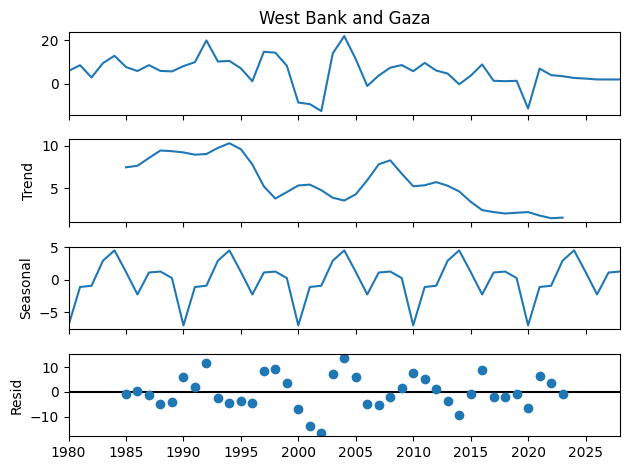

In [5]:
## Testing the seasonal decompose 
from statsmodels.tsa.seasonal import seasonal_decompose

def test_seasonal_decompose(df,list_columns):
    for column in list_columns:
        resultado = seasonal_decompose(df[column], period=10)
        fig = plt.figure(figsize=(8, 6))  
        fig = resultado.plot()

test_seasonal_decompose(df_original,random_list_columns)

In [6]:
def metrics(y_true, y_pred, list_name, model_name):

    dicio = []
    for i in list_name:

        y_true_2 = y_true[[i]].values
        y_pred_2 = y_pred[[i]].values


        mae = round(np.mean(np.abs((y_true_2 - y_pred_2) / y_true_2)) * 100, 2)
        rmse = round(np.sqrt(mean_squared_error(y_true_2, y_pred_2)), 2)
        mape = round(mean_absolute_percentage_error(y_true_2, y_pred_2), 2)

        dicio.append({'Country':i,'Model': model_name,'mae': mae, 'rmse': rmse, 'mape': mape})
    
    metrics = pd.DataFrame(dicio)
    return metrics


In [7]:
def test_adfuller(df,sample_list):
    list_stacionary = []
    list_no_stacionary = []

    print("Result of p-value to sample data \n")
    
    for column in sample_list:
        result = adfuller(df_original[column].iloc[:-5])
        print(column)
        print(f'ADF: {result[0]}')
        print(f'p-value: {result[1]}')
        print('-'*50)
    
    for column in df.columns:
        result = adfuller(df_original[column].iloc[:-5])
        if result[1] <= 0.05:
            list_stacionary.append(column)
        else:
            list_no_stacionary.append(column)
    
    stacionary_total = len(list_stacionary)
    stacionary_p = (stacionary_total/len(df.columns)*100)

    no_stacionary_total = len(list_no_stacionary)
    no_stacionary_p = (no_stacionary_total/len(df.columns)*100)
    
    print(f"\nTotal of stacionary is {stacionary_total} and it represents {stacionary_p} %")
    print(f"Total of Non stacionary is {no_stacionary_total} and it represents {no_stacionary_p} %")
    
    return (list_stacionary,list_no_stacionary)

In [49]:
def prediction(df_train, list_columns, trend= None, d=None, stationary=True, seasonal=True):

    df_prediction = pd.DataFrame()

    for column in list_columns:
        model_sarimax = auto_arima(
            df_train[column],
            start_p=0, max_p=2, 
            start_q=0, max_q=2,
            # start_P=0, max_P=2,
            # start_Q=0, max_Q=2,
            m=10, 
            seasonal=seasonal,
            stationary=stationary,
            d=d, 
            trend= trend,
            test = 'adf',
            error_acCtion='ignore', 
            stepwise=True
        )

        pred_sarimax = model_sarimax.predict(df_test.shape[0])
        
        df_prediction = pd.concat([df_prediction, pd.DataFrame(pred_sarimax,columns=[column])], axis=1).round()

    return pred_sarimax


list_no_stacionary2 = ['Afghanistan'] 
df_pred_no_stacionary2 = prediction(df_train, list_no_stacionary2, stationary = False, d=1)
df_pred_no_stacionary2

2024-01-01    12.326083
2025-01-01    12.112488
2026-01-01    12.245596
2027-01-01    12.162646
2028-01-01    12.214339
Freq: AS-JAN, dtype: float64

In [9]:
df_train = df_original.iloc[:-5].copy()
df_test = df_original.iloc[44:].copy()

In [10]:
list_stacionary,list_no_stacionary = test_adfuller(df_train,random_list_columns)

Result of p-value to sample data 

West Bank and Gaza
ADF: -4.649482890448259
p-value: 0.00010459686107035023
--------------------------------------------------



Total of stacionary is 194 and it represents 85.08771929824562 %
Total of Non stacionary is 34 and it represents 14.912280701754385 %


In [11]:
df_pred_stacionary = prediction(df_train, list_stacionary)
df_pred_stacionary

,ASEAN-5,Advanced economies,Africa (Region),Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Asia and Pacific,Australia,Australia and New Zealand,Austria,Azerbaijan,Bahrain,Barbados,Belgium,Belize,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Burkina Faso,Burundi,Cabo Verde,Cambodia,Canada,Caribbean,Central African Republic,Central America,Central Asia and the Caucasus,Chad,Chile,China,Colombia,Comoros,Costa Rica,Croatia,Cyprus,Czech Republic,Côte d'Ivoire,Denmark,Dominica,Dominican Republic,East Asia,Eastern Europe,Ecuador,Egypt,El Salvador,Emerging and Developing Asia,Emerging and Developing Europe,Emerging market and developing economies,Eritrea,Estonia,Eswatini,Euro area,Europe,European Union,Fed. States of Micronesia,Fiji,Finland,France,Gabon,Georgia,Germany,Ghana,Greece,Grenada,Guatemala,Guinea,Guinea-Bissau,Haiti,Honduras,Hong Kong SAR,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Jamaica,Japan,Jordan,Kenya,Kiribati,Kosovo,Kuwait,Kyrgyz Republic,Lao P.D.R.,Latin America and the Caribbean,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Luxembourg,Macao SAR,Madagascar,Major advanced economies (G7),Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Mauritania,Mauritius,Mexico,Middle East (Region),Middle East and Central Asia,Mongolia,Morocco,Namibia,Nauru,Nepal,Netherlands,New Zealand,Nicaragua,Nigeria,North Africa,North America,North Macedonia,Norway,Oman,Pacific Islands,Pakistan,Palau,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Republic of Congo,Republic of South Sudan,Republic of Turkiye,Romania,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,Samoa,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovak Republic,Slovenia,Solomon Islands,South Africa,South America,South Asia,Southeast Asia,Spain,Sub-Saharan Africa,Sub-Saharan Africa (Region),Sudan,Suriname,Sweden,Switzerland,Syria,São Tomé and Príncipe,Thailand,The Gambia,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Western Europe,Western Hemisphere (Region),World
2024-01-01,5.0,2.0,4.0,4.0,2.0,1.0,4.0,4.0,2.0,5.0,1.0,5.0,4.0,4.0,2.0,3.0,4.0,1.0,2.0,4.0,5.0,2.0,4.0,6.0,2.0,5.0,1.0,5.0,8.0,2.0,6.0,0.0,4.0,4.0,4.0,5.0,7.0,3.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,3.0,5.0,5.0,0.0,3.0,4.0,2.0,6.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,2.0,0.0,2.0,1.0,2.0,1.0,-0.0,2.0,3.0,1.0,3.0,3.0,5.0,2.0,1.0,3.0,4.0,0.0,2.0,6.0,5.0,3.0,7.0,5.0,4.0,1.0,1.0,4.0,4.0,1.0,5.0,0.0,2.0,5.0,2.0,1.0,1.0,3.0,5.0,-8.0,1.0,3.0,-21.0,2.0,2.0,4.0,5.0,4.0,4.0,3.0,3.0,4.0,4.0,2.0,3.0,3.0,5.0,4.0,2.0,7.0,5.0,2.0,3.0,3.0,4.0,3.0,3.0,1.0,2.0,3.0,3.0,3.0,5.0,5.0,3.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,2.0,5.0,2.0,5.0,4.0,3.0,2.0,5.0,1.0,2.0,4.0,4.0,3.0,2.0,5.0,3.0,3.0,3.0,2.0,2.0,6.0,5.0,2.0,4.0,4.0,3.0,0.0,2.0,2.0,2.0,2.0,5.0,1.0,2.0,3.0,0.0,3.0,3.0,4.0,5.0,-9.0,4.0,2.0,3.0,2.0,3.0,3.0,3.0,6.0,2.0,3.0,3.0
2025-01-01,5.0,2.0,4.0,3.0,2.0,2.0,4.0,3.0,2.0,6.0,5.0,5.0,3.0,3.0,2.0,3.0,4.0,0.0,2.0,5.0,7.0,2.0,5.0,6.0,2.0,5.0,4.0,5.0,8.0,2.0,2.0,0.0,4.0,5.0,4.0,5.0,8.0,3.0,3.0,4.0,0.0,4.0,2.0,4.0,2.0,3.0,5.0,6.0,0.0,3.0,4.0,2.0,7.0,2.0,4.0,3.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,-2.0,2.0,3.0,2.0,3.0,3.0,4.0,3.0,1.0,3.0,4.0,1.0,3.0,6.0,5.0,7.0,8.0,5.0,4.0,1.0,1.0,3.0,4.0,4.0,6.0,0.0,1.0,5.0,2.0,3.0,-0.0,3.0,5.0,0.0,2.0,3.0,45.0,2.0,2.0,4.0,6.0,7.0,4.0,2.0,3.0,4.0,4.0,2.0,3.0,3.0,5.0,3.0,2.0,6.0,4.0,2.0,3.0,2.0,4.0,2.0,3.0,0.0,2.0,4.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0,3.0,3.0,5.0,2.0,5.0,4.0,3.0,3.0,2.0,-1.0,2.0,4.0,4.0,4.0,0.0,6.0,4.0,3.0,3.0,2.0,2.0,6.0,5.0,2.0,4.0,4.0,3.0,0.0,2.0,2.0,1.0,2.0,5.0,3.0,3.0,3.0,0.0,3.0,3.0,2.0,5.0,-4.0,4.0,2.0,3.0,3.0,2.0,1.0,7.0,6.0,2.0,3.0,3.0
2026-01-01,5.0,2.0,5.0,3.0,2.0,2.0,5.0,3.0,2.0,7.0,3.0,5.0,3.0,3.0,2.0,4.0,4.0,0.0,2.0,5.0,7.0,2.0,6.0,6.0,2.0,5.0,3.0,5.0,7.0,2.0,2.0,0.0,4.0,5.0,4.0,5.0,8.0,3.0,2.0,3.0,0.0,4.0,3.0,3.0,2.0,3.0,5.0,6.0,0.0,

In [12]:
df_metric_stacionary = metrics(df_test, df_pred_stacionary,list_stacionary,'SARIMA')
df_metric_stacionary

,Country,Model,mae,rmse,mape
0,ASEAN-5,SARIMA,9.18,0.42,0.09
1,Advanced economies,SARIMA,16.29,0.31,0.16
2,Africa (Region),SARIMA,9.64,0.45,0.10
3,Albania,SARIMA,13.65,0.48,0.14
4,Algeria,SARIMA,13.14,0.33,0.13
...,...,...,...,...,...
189,Vietnam,SARIMA,19.95,1.93,0.20
190,West Bank and Gaza,SARIMA,174.44,3.79,1.74
191,Western Europe,SARIMA,30.59,0.49,0.31
192,Western Hemisphere (Region),SARIMA,56.25,1.07,0.56


In [81]:
pd.set_option("display.max_rows", 10)

df_metric_sarima_stacionary = metrics(df_test, df_pred_stacionary,list_stacionary,'SARIMA')
df_metric_sarima_stacionary
## este com ct

,Country,Model,mae,rmse,mape
0,ASEAN-5,SARIMA,9.18,0.42,0.09
1,Advanced economies,SARIMA,16.29,0.31,0.16
2,Africa (Region),SARIMA,9.64,0.45,0.10
3,Albania,SARIMA,13.65,0.48,0.14
4,Algeria,SARIMA,13.14,0.33,0.13
...,...,...,...,...,...
189,Vietnam,SARIMA,19.95,1.93,0.20
190,West Bank and Gaza,SARIMA,174.44,3.79,1.74
191,Western Europe,SARIMA,30.59,0.49,0.31
192,Western Hemisphere (Region),SARIMA,56.25,1.07,0.56


In [ ]:
df_pred_no_stacionary = prediction(df_train, list_no_stacionary, stationary = False, d=1)
df_pred_no_stacionary

In [18]:
df_metric_sarima_no_stacionary = metrics(df_test, df_pred_no_stacionary,list_no_stacionary,'SARIMA')
df_metric_sarima_no_stacionary

,Country,Model,mae,rmse,mape
0,Afghanistan,SARIMA,16.84,2.47,0.17
1,Bangladesh,SARIMA,14.84,1.11,0.15
2,Belarus,SARIMA,33.81,0.28,0.34
3,Benin,SARIMA,16.37,0.98,0.16
4,Brunei Darussalam,SARIMA,69.42,2.08,0.69
...,...,...,...,...,...
29,Turkmenistan,SARIMA,13.39,0.36,0.13
30,Uzbekistan,SARIMA,9.09,0.50,0.09
31,Yemen,SARIMA,145.81,7.61,1.46
32,Zambia,SARIMA,35.79,1.74,0.36


In [84]:
df_metrics_sarima = pd.concat([df_metric_sarima_no_stacionary,df_metric_sarima_stacionary])
df_metrics_sarima

,Country,Model,mae,rmse,mape
0,Afghanistan,SARIMA,16.84,2.47,0.17
1,Bangladesh,SARIMA,14.84,1.11,0.15
2,Belarus,SARIMA,33.81,0.28,0.34
3,Benin,SARIMA,16.37,0.98,0.16
4,Brunei Darussalam,SARIMA,69.42,2.08,0.69
...,...,...,...,...,...
189,Vietnam,SARIMA,19.95,1.93,0.20
190,West Bank and Gaza,SARIMA,174.44,3.79,1.74
191,Western Europe,SARIMA,30.59,0.49,0.31
192,Western Hemisphere (Region),SARIMA,56.25,1.07,0.56


In [ ]:
# random_stacionary_list = [random.randint(0,193) for _ in range(10)]
# random_no_stacionary_list = [random.randint(0,33) for _ in range(10)]

# print(random_stacionary_list)
# print(random_no_stacionary_list)

# OUTPUT
random_stacionary_list = [4, 15, 22, 58, 113, 131, 150, 181, 188, 189]
random_no_stacionary_list = [3, 4, 11, 11, 16, 24, 25, 29, 30, 33]

In [ ]:
def plot_test_pred(df_train,df_test,df_pred,random_columns_list, model_type):
    columns = df_pred.iloc[:1,random_columns_list].columns
    
    for i in columns:
        fig, axs = plt.subplots(figsize=(8, 3))

        axs.plot(df_train[i].index, df_train[i])
        axs.plot(df_pred[i].index, df_pred[i])
        axs.plot(df_test[i].index, df_test[i])
        axs.legend(['Train','Pred','Test'])
        axs.set_title(f'Model {model_type} - {i}')
        plt.show()


In [ ]:
plot_test_pred(df_train ,df_test,df_pred_stacionary,random_stacionary_list, 'SARIMA')

In [ ]:
plot_test_pred(df_train ,df_test,df_pred_no_stacionary,random_no_stacionary_list,'SARIMA')

In [ ]:
model_ses = SimpleExpSmoothing(
    df_train['ASEAN-5'],
    initialization_method='heuristic',                              
).fit(smoothing_level=0.2, optimized=True)

pred_hot_winter = model_ses.forecast(df_test['ASEAN-5'].shape[0])
df_train['ASEAN-5'].plot(legend=True, label='Train')
df_test['ASEAN-5'].plot(legend=True, label='Test')
pred_hot_winter.plot(legend=True, label='Pred')

/home/thaina/indicium_particular/desafio_df_v3/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/home/thaina/indicium_particular/desafio_df_v3/venv/lib/python3.10/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


2024-01-01    3.834189
2025-01-01    3.834189
2026-01-01    3.834189
2027-01-01    3.834189
2028-01-01    3.834189
Freq: AS-JAN, dtype: float64

## Simple Exponential Smoothing 

In [19]:
def testing_smoothing_level(df_train, df_test, columns):
    smoothing_list = []

    for i in columns:
        
        best_mse = float('inf')
        best_smoothing_level = None
        smoothing_levels = np.linspace(0.01, 1, 10)

        for smoothing_level in smoothing_levels:
            model = SimpleExpSmoothing(df_train[i]).fit(smoothing_level=smoothing_level)
            forecast = model.forecast(steps=len(df_test[i]))
            mse = mean_squared_error(df_test[i], forecast)
            
            if mse < best_mse:
                best_mse = mse
                best_smoothing_level = smoothing_level

        smoothing_list.append({'Country':i,'best_smoothing_level': best_smoothing_level})

    smoothing_level = pd.DataFrame(smoothing_list)

    return smoothing_level

#### Aplaying test smoothing level

In [23]:
smoothing_level_stacionary = testing_smoothing_level(df_train, df_test, list_stacionary)


/home/thaina/indicium_particular/desafio_df_v3/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/home/thaina/indicium_particular/desafio_df_v3/venv/lib/python3.10/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/home/thaina/indicium_particular/desafio_df_v3/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/home/thaina/indicium_particular/desafio_df_v3/venv/lib/python3.10/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/hom

In [24]:
smoothing_level_no_stacionary = testing_smoothing_level(df_train, df_test, list_no_stacionary)

/home/thaina/indicium_particular/desafio_df_v3/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/home/thaina/indicium_particular/desafio_df_v3/venv/lib/python3.10/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/home/thaina/indicium_particular/desafio_df_v3/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/home/thaina/indicium_particular/desafio_df_v3/venv/lib/python3.10/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/hom

/home/thaina/indicium_particular/desafio_df_v3/venv/lib/python3.10/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/home/thaina/indicium_particular/desafio_df_v3/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/home/thaina/indicium_particular/desafio_df_v3/venv/lib/python3.10/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/home/thaina/indicium_particular/desafio_df_v3/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/hom

#### Results

In [25]:
smoothing_level_stacionary

,Country,best_smoothing_level
0,ASEAN-5,0.78
1,Advanced economies,0.23
2,Africa (Region),0.01
3,Albania,0.12
4,Algeria,0.45
...,...,...
189,Vietnam,0.78
190,West Bank and Gaza,0.23
191,Western Europe,0.34
192,Western Hemisphere (Region),0.12


In [26]:
smoothing_level_no_stacionary

,Country,best_smoothing_level
0,Afghanistan,0.89
1,Bangladesh,0.23
2,Belarus,1.00
3,Benin,1.00
4,Brunei Darussalam,1.00
...,...,...
29,Turkmenistan,1.00
30,Uzbekistan,0.34
31,Yemen,0.01
32,Zambia,1.00


# applying smoothing

In [67]:
##arrumar aqui e entende ro que ta acontecendo
def simple_smoothing(df_train, df_test, smoothing_level):

    df_prediction = pd.DataFrame()
    
    for i in smoothing_level.index:
        column = smoothing_level['Country'].iloc[i]
        # print(column)
        model_ses = SimpleExpSmoothing(
            df_train[column],
            initialization_method='estimated', #heurustic                             
        ).fit(smoothing_level=smoothing_level['best_smoothing_level'].iloc[i], optimized=True)
        
        pred_ses = model_ses.forecast(df_test.shape[0])


        df_prediction = pd.concat([df_prediction, pd.DataFrame(pred_ses,columns=[column])], axis=1).round()

    simple_smoothing_pred = pd.DataFrame(df_prediction)
    
    return simple_smoothing_pred

In [ ]:
simple_smoothing_pred_no_stationary =simple_smoothing(df_train, df_test, smoothing_level_no_stacionary)

In [ ]:
simple_smoothing_pred_stationary =simple_smoothing(df_train, df_test, smoothing_level_stacionary)

In [71]:
simple_smoothing_pred_no_stationary

,Afghanistan,Bangladesh,Belarus,Benin,Brunei Darussalam,Bulgaria,Cameroon,Dem. Rep. of the Congo,Djibouti,Equatorial Guinea,Ethiopia,Guyana,Italy,Kazakhstan,Moldova,Montenegro,Mozambique,Myanmar,Niger,Other advanced economies,Puerto Rico,Republic of Korea,Russian Federation,Somalia,Sri Lanka,Taiwan Province of China,Tajikistan,Tanzania,The Bahamas,Turkmenistan,Uzbekistan,Yemen,Zambia,Zimbabwe
2024-01-01,12.0,6.0,1.0,6.0,3.0,3.0,4.0,6.0,4.0,-2.0,7.0,19.0,1.0,3.0,2.0,3.0,5.0,3.0,7.0,2.0,-0.0,2.0,1.0,5.0,2.0,2.0,5.0,6.0,2.0,2.0,6.0,2.0,4.0,3.0
2025-01-01,12.0,6.0,1.0,6.0,3.0,3.0,4.0,6.0,4.0,-2.0,7.0,19.0,1.0,3.0,2.0,3.0,5.0,3.0,7.0,2.0,-0.0,2.0,1.0,5.0,2.0,2.0,5.0,6.0,2.0,2.0,6.0,2.0,4.0,3.0
2026-01-01,12.0,6.0,1.0,6.0,3.0,3.0,4.0,6.0,4.0,-2.0,7.0,19.0,1.0,3.0,2.0,3.0,5.0,3.0,7.0,2.0,-0.0,2.0,1.0,5.0,2.0,2.0,5.0,6.0,2.0,2.0,6.0,2.0,4.0,3.0
2027-01-01,12.0,6.0,1.0,6.0,3.0,3.0,4.0,6.0,4.0,-2.0,7.0,19.0,1.0,3.0,2.0,3.0,5.0,3.0,7.0,2.0,-0.0,2.0,1.0,5.0,2.0,2.0,5.0,6.0,2.0,2.0,6.0,2.0,4.0,3.0
2028-01-01,12.0,6.0,1.0,6.0,3.0,3.0,4.0,6.0,4.0,-2.0,7.0,19.0,1.0,3.0,2.0,3.0,5.0,3.0,7.0,2.0,-0.0,2.0,1.0,5.0,2.0,2.0,5.0,6.0,2.0,2.0,6.0,2.0,4.0,3.0


In [72]:
simple_smoothing_pred_stationary

,ASEAN-5,Advanced economies,Africa (Region),Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Asia and Pacific,Australia,Australia and New Zealand,Austria,Azerbaijan,Bahrain,Barbados,Belgium,Belize,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Burkina Faso,Burundi,Cabo Verde,Cambodia,Canada,Caribbean,Central African Republic,Central America,Central Asia and the Caucasus,Chad,Chile,China,Colombia,Comoros,Costa Rica,Croatia,Cyprus,Czech Republic,Côte d'Ivoire,Denmark,Dominica,Dominican Republic,East Asia,Eastern Europe,Ecuador,Egypt,El Salvador,Emerging and Developing Asia,Emerging and Developing Europe,Emerging market and developing economies,Eritrea,Estonia,Eswatini,Euro area,Europe,European Union,Fed. States of Micronesia,Fiji,Finland,France,Gabon,Georgia,Germany,Ghana,Greece,Grenada,Guatemala,Guinea,Guinea-Bissau,Haiti,Honduras,Hong Kong SAR,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Jamaica,Japan,Jordan,Kenya,Kiribati,Kosovo,Kuwait,Kyrgyz Republic,Lao P.D.R.,Latin America and the Caribbean,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Luxembourg,Macao SAR,Madagascar,Major advanced economies (G7),Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Mauritania,Mauritius,Mexico,Middle East (Region),Middle East and Central Asia,Mongolia,Morocco,Namibia,Nauru,Nepal,Netherlands,New Zealand,Nicaragua,Nigeria,North Africa,North America,North Macedonia,Norway,Oman,Pacific Islands,Pakistan,Palau,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Republic of Congo,Republic of South Sudan,Republic of Turkiye,Romania,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,Samoa,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovak Republic,Slovenia,Solomon Islands,South Africa,South America,South Asia,Southeast Asia,Spain,Sub-Saharan Africa,Sub-Saharan Africa (Region),Sudan,Suriname,Sweden,Switzerland,Syria,São Tomé and Príncipe,Thailand,The Gambia,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Western Europe,Western Hemisphere (Region),World
2024-01-01,5.0,2.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,5.0,2.0,4.0,2.0,2.0,2.0,3.0,3.0,3.0,1.0,3.0,5.0,2.0,3.0,4.0,2.0,5.0,3.0,5.0,6.0,2.0,7.0,2.0,4.0,3.0,4.0,2.0,5.0,3.0,3.0,3.0,3.0,3.0,2.0,6.0,1.0,3.0,5.0,4.0,2.0,3.0,4.0,2.0,5.0,2.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,4.0,1.0,1.0,3.0,5.0,2.0,5.0,1.0,3.0,4.0,5.0,4.0,0.0,4.0,3.0,3.0,2.0,6.0,5.0,2.0,4.0,5.0,3.0,2.0,1.0,3.0,5.0,2.0,4.0,2.0,4.0,4.0,2.0,2.0,6.0,2.0,5.0,6.0,2.0,2.0,7.0,4.0,2.0,4.0,4.0,7.0,5.0,4.0,2.0,4.0,4.0,2.0,3.0,3.0,5.0,3.0,3.0,2.0,5.0,1.0,2.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,5.0,3.0,3.0,3.0,6.0,3.0,2.0,3.0,4.0,4.0,3.0,3.0,6.0,3.0,2.0,3.0,3.0,1.0,3.0,6.0,3.0,4.0,3.0,2.0,2.0,3.0,2.0,1.0,2.0,6.0,5.0,2.0,4.0,4.0,3.0,2.0,2.0,2.0,-0.0,3.0,3.0,5.0,3.0,6.0,2.0,2.0,2.0,3.0,6.0,-1.0,4.0,1.0,2.0,3.0,3.0,3.0,6.0,2.0,2.0,2.0,3.0
2025-01-01,5.0,2.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,5.0,2.0,4.0,2.0,2.0,2.0,3.0,3.0,3.0,1.0,3.0,5.0,2.0,3.0,4.0,2.0,5.0,3.0,5.0,6.0,2.0,7.0,2.0,4.0,3.0,4.0,2.0,5.0,3.0,3.0,3.0,3.0,3.0,2.0,6.0,1.0,3.0,5.0,4.0,2.0,3.0,4.0,2.0,5.0,2.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,4.0,1.0,1.0,3.0,5.0,2.0,5.0,1.0,3.0,4.0,5.0,4.0,0.0,4.0,3.0,3.0,2.0,6.0,5.0,2.0,4.0,5.0,3.0,2.0,1.0,3.0,5.0,2.0,4.0,2.0,4.0,4.0,2.0,2.0,6.0,2.0,5.0,6.0,2.0,2.0,7.0,4.0,2.0,4.0,4.0,7.0,5.0,4.0,2.0,4.0,4.0,2.0,3.0,3.0,5.0,3.0,3.0,2.0,5.0,1.0,2.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,5.0,3.0,3.0,3.0,6.0,3.0,2.0,3.0,4.0,4.0,3.0,3.0,6.0,3.0,2.0,3.0,3.0,1.0,3.0,6.0,3.0,4.0,3.0,2.0,2.0,3.0,2.0,1.0,2.0,6.0,5.0,2.0,4.0,4.0,3.0,2.0,2.0,2.0,-0.0,3.0,3.0,5.0,3.0,6.0,2.0,2.0,2.0,3.0,6.0,-1.0,4.0,1.0,2.0,3.0,3.0,3.0,6.0,2.0,2.0,2.0,3.0
2026-01-01,5.0,2.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,5.0,2.0,4.0,2.0,2.0,2.0,3.0,3.0,3.0,1.0,3.0,5.0,2.0,3.0,4.0,2.0,5.0,3.0,5.0,6.0,2.0,7.0,2.0,4.0,3.0,4.0,2.0,5.0,3.0,3.0,3.0,3.0,3.0,2.0,6.0,1.0,3.0,5.0,4.0,2.0,3.0,4.

# metrics smoothing

In [78]:
df_metric_simple_smoothing_no_stacionary = metrics(df_test, simple_smoothing_pred_no_stationary,list_no_stacionary,'SIMPLE SMOTHING')
df_metric_simple_smoothing_no_stacionary

,Country,Model,mae,rmse,mape
0,Afghanistan,SIMPLE SMOTHING,16.84,2.47,0.17
1,Bangladesh,SIMPLE SMOTHING,14.84,1.11,0.15
2,Belarus,SIMPLE SMOTHING,33.81,0.28,0.34
3,Benin,SIMPLE SMOTHING,1.01,0.08,0.01
4,Brunei Darussalam,SIMPLE SMOTHING,10.40,0.37,0.10
...,...,...,...,...,...
29,Turkmenistan,SIMPLE SMOTHING,13.39,0.36,0.13
30,Uzbekistan,SIMPLE SMOTHING,9.09,0.50,0.09
31,Yemen,SIMPLE SMOTHING,54.19,3.83,0.54
32,Zambia,SIMPLE SMOTHING,14.39,0.78,0.14


In [79]:
df_metric_simple_smoothing_stacionary = metrics(df_test, simple_smoothing_pred_stationary,list_stacionary,'SIMPLE SMOTHING')
df_metric_simple_smoothing_stacionary

,Country,Model,mae,rmse,mape
0,ASEAN-5,SIMPLE SMOTHING,9.18,0.42,0.09
1,Advanced economies,SIMPLE SMOTHING,16.29,0.31,0.16
2,Africa (Region),SIMPLE SMOTHING,7.78,0.35,0.08
3,Albania,SIMPLE SMOTHING,11.23,0.38,0.11
4,Algeria,SIMPLE SMOTHING,13.14,0.33,0.13
...,...,...,...,...,...
189,Vietnam,SIMPLE SMOTHING,11.23,0.76,0.11
190,West Bank and Gaza,SIMPLE SMOTHING,8.52,0.36,0.09
191,Western Europe,SIMPLE SMOTHING,30.59,0.49,0.31
192,Western Hemisphere (Region),SIMPLE SMOTHING,15.08,0.31,0.15


In [80]:
df_metrics_simple_smoothing = pd.concat([df_metric_simple_smoothing_no_stacionary,df_metric_simple_smoothing_stacionary])
df_metrics_simple_smoothing

,Country,Model,mae,rmse,mape
0,Afghanistan,SIMPLE SMOTHING,16.84,2.47,0.17
1,Bangladesh,SIMPLE SMOTHING,14.84,1.11,0.15
2,Belarus,SIMPLE SMOTHING,33.81,0.28,0.34
3,Benin,SIMPLE SMOTHING,1.01,0.08,0.01
4,Brunei Darussalam,SIMPLE SMOTHING,10.40,0.37,0.10
...,...,...,...,...,...
189,Vietnam,SIMPLE SMOTHING,11.23,0.76,0.11
190,West Bank and Gaza,SIMPLE SMOTHING,8.52,0.36,0.09
191,Western Europe,SIMPLE SMOTHING,30.59,0.49,0.31
192,Western Hemisphere (Region),SIMPLE SMOTHING,15.08,0.31,0.15


# selecting model

In [217]:
import pandas as pd

def compare_and_calculate_percentages(df_a, df_b,column):
    if len(df_a) != len(df_b):
        raise ValueError("DataFrames must have the same number of rows.")

    total_rows = len(df_a)
    count_a_greater = 0
    count_b_greater = 0
    count_equal = 0

    for value_a, value_b in zip(df_a.iloc[:, column], df_b.iloc[:, column]):
        # print(df_a.iloc[index:index+1,-2:-1])
        if value_a > value_b:
            count_a_greater += 1
        elif value_a < value_b:
            count_b_greater += 1
        else:
            count_equal += 1

    percent_a_greater = (count_a_greater / total_rows) * 100
    percent_b_greater = (count_b_greater / total_rows) * 100
    percent_equal = (count_equal / total_rows) * 100

    print(f"Percentage of times A was greater than B: {percent_a_greater:.2f}%")
    print(f"Percentage of times B was greater than A: {percent_b_greater:.2f}%")
    print(f"Percentage of times A and B were equal: {percent_equal:.2f}%")

Percentage of times A was greater than B: 65.35%
Percentage of times B was greater than A: 6.14%
Percentage of times A and B were equal: 28.51%
------------------------------------------------------------
Percentage of times A was greater than B: 66.67%
Percentage of times B was greater than A: 4.82%
Percentage of times A and B were equal: 28.51%


In [ ]:
compare_and_calculate_percentages(df_metrics_sarima, df_metrics_simple_smoothing, column=-1)
print('-'*60)
compare_and_calculate_percentages(df_metrics_sarima, df_metrics_simple_smoothing, column=-2)

# final model

In [ ]:
Since simple_smoothing had better parameters comparing to sarime, I decided to use is has final model to predict the series

In [149]:
final_pred_model = pd.concat([simple_smoothing_pred_no_stationary,simple_smoothing_pred_stationary], axis = 1)
final_pred_model

,Afghanistan,Bangladesh,Belarus,Benin,Brunei Darussalam,Bulgaria,Cameroon,Dem. Rep. of the Congo,Djibouti,Equatorial Guinea,Ethiopia,Guyana,Italy,Kazakhstan,Moldova,Montenegro,Mozambique,Myanmar,Niger,Other advanced economies,Puerto Rico,Republic of Korea,Russian Federation,Somalia,Sri Lanka,Taiwan Province of China,Tajikistan,Tanzania,The Bahamas,Turkmenistan,Uzbekistan,Yemen,Zambia,Zimbabwe,ASEAN-5,Advanced economies,Africa (Region),Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Asia and Pacific,Australia,Australia and New Zealand,Austria,Azerbaijan,Bahrain,Barbados,Belgium,Belize,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Burkina Faso,Burundi,Cabo Verde,Cambodia,Canada,Caribbean,Central African Republic,Central America,Central Asia and the Caucasus,Chad,Chile,China,Colombia,Comoros,Costa Rica,Croatia,Cyprus,Czech Republic,Côte d'Ivoire,Denmark,Dominica,Dominican Republic,East Asia,Eastern Europe,Ecuador,Egypt,El Salvador,Emerging and Developing Asia,Emerging and Developing Europe,Emerging market and developing economies,Eritrea,Estonia,Eswatini,Euro area,Europe,European Union,Fed. States of Micronesia,Fiji,Finland,France,Gabon,Georgia,Germany,Ghana,Greece,Grenada,Guatemala,Guinea,Guinea-Bissau,Haiti,Honduras,Hong Kong SAR,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Jamaica,Japan,Jordan,Kenya,Kiribati,Kosovo,Kuwait,Kyrgyz Republic,Lao P.D.R.,Latin America and the Caribbean,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Luxembourg,Macao SAR,Madagascar,Major advanced economies (G7),Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Mauritania,Mauritius,Mexico,Middle East (Region),Middle East and Central Asia,Mongolia,Morocco,Namibia,Nauru,Nepal,Netherlands,New Zealand,Nicaragua,Nigeria,North Africa,North America,North Macedonia,Norway,Oman,Pacific Islands,Pakistan,Palau,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Republic of Congo,Republic of South Sudan,Republic of Turkiye,Romania,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,Samoa,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovak Republic,Slovenia,Solomon Islands,South Africa,South America,South Asia,Southeast Asia,Spain,Sub-Saharan Africa,Sub-Saharan Africa (Region),Sudan,Suriname,Sweden,Switzerland,Syria,São Tomé and Príncipe,Thailand,The Gambia,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Western Europe,Western Hemisphere (Region),World
2024-01-01,12.0,6.0,1.0,6.0,3.0,3.0,4.0,6.0,4.0,-2.0,7.0,19.0,1.0,3.0,2.0,3.0,5.0,3.0,7.0,2.0,-0.0,2.0,1.0,5.0,2.0,2.0,5.0,6.0,2.0,2.0,6.0,2.0,4.0,3.0,5.0,2.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,5.0,2.0,4.0,2.0,2.0,2.0,3.0,3.0,3.0,1.0,3.0,5.0,2.0,3.0,4.0,2.0,5.0,3.0,5.0,6.0,2.0,7.0,2.0,4.0,3.0,4.0,2.0,5.0,3.0,3.0,3.0,3.0,3.0,2.0,6.0,1.0,3.0,5.0,4.0,2.0,3.0,4.0,2.0,5.0,2.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,4.0,1.0,1.0,3.0,5.0,2.0,5.0,1.0,3.0,4.0,5.0,4.0,0.0,4.0,3.0,3.0,2.0,6.0,5.0,2.0,4.0,5.0,3.0,2.0,1.0,3.0,5.0,2.0,4.0,2.0,4.0,4.0,2.0,2.0,6.0,2.0,5.0,6.0,2.0,2.0,7.0,4.0,2.0,4.0,4.0,7.0,5.0,4.0,2.0,4.0,4.0,2.0,3.0,3.0,5.0,3.0,3.0,2.0,5.0,1.0,2.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,5.0,3.0,3.0,3.0,6.0,3.0,2.0,3.0,4.0,4.0,3.0,3.0,6.0,3.0,2.0,3.0,3.0,1.0,3.0,6.0,3.0,4.0,3.0,2.0,2.0,3.0,2.0,1.0,2.0,6.0,5.0,2.0,4.0,4.0,3.0,2.0,2.0,2.0,-0.0,3.0,3.0,5.0,3.0,6.0,2.0,2.0,2.0,3.0,6.0,-1.0,4.0,1.0,2.0,3.0,3.0,3.0,6.0,2.0,2.0,2.0,3.0
2025-01-01,12.0,6.0,1.0,6.0,3.0,3.0,4.0,6.0,4.0,-2.0,7.0,19.0,1.0,3.0,2.0,3.0,5.0,3.0,7.0,2.0,-0.0,2.0,1.0,5.0,2.0,2.0,5.0,6.0,2.0,2.0,6.0,2.0,4.0,3.0,5.0,2.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,5.0,2.0,4.0,2.0,2.0,2.0,3.0,3.0,3.0,1.0,3.0,5.0,2.0,3.0,4.0,2.0,5.0,3.0,5.0,6.0,2.0,7.0,2.0,4.0,3.0,4.0,2.0,5.0,3.0,3.0,3.0,3.0,3.0,2.0,6.0,1.0,3.0,5.0,4.0,2.0,3.0,4.0,2.0,5.0,2.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,4.0,1.0,1.0,3.0,5.0,2.0,5.0,1.0,3.0,4.0,5.0,4.0,0.0,4.0,3.0,3.0,2.0,

In [247]:
first_column= final_pred_model.iloc[:, 0]

remaining_columns= final_pred_model.iloc[:, 1:].reindex(sorted(final_pred_model.columns[1:]), axis=1)

df_result_pred = pd.concat([first_column, remaining_columns], axis=1)

# df_result_pred 

In [318]:
df_final = pd.concat([df_train,df_result_pred])
# df_final.round(1)

In [319]:
df_final.reset_index()
df_final.index = df_final.index.year

df_final = df_final.reset_index()
df_final.rename(columns ={'index':'Real GDP growth (Annual percent change)'}, inplace= True)

df_final

,Real GDP growth (Annual percent change),ASEAN-5,Advanced economies,Afghanistan,Africa (Region),Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Asia and Pacific,Australia,Australia and New Zealand,Austria,Azerbaijan,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Caribbean,Central African Republic,Central America,Central Asia and the Caucasus,Chad,Chile,China,Colombia,Comoros,Costa Rica,Croatia,Cyprus,Czech Republic,Côte d'Ivoire,Dem. Rep. of the Congo,Denmark,Djibouti,Dominica,Dominican Republic,East Asia,Eastern Europe,Ecuador,Egypt,El Salvador,Emerging and Developing Asia,Emerging and Developing Europe,Emerging market and developing economies,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Euro area,Europe,European Union,Fed. States of Micronesia,Fiji,Finland,France,Gabon,Georgia,Germany,Ghana,Greece,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hong Kong SAR,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Kosovo,Kuwait,Kyrgyz Republic,Lao P.D.R.,Latin America and the Caribbean,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Luxembourg,Macao SAR,Madagascar,Major advanced economies (G7),Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Mauritania,Mauritius,Mexico,Middle East (Region),Middle East and Central Asia,Moldova,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Africa,North America,North Macedonia,Norway,Oman,Other advanced economies,Pacific Islands,Pakistan,Palau,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Republic of Congo,Republic of Korea,Republic of South Sudan,Republic of Turkiye,Romania,Russian Federation,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,Samoa,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovak Republic,Slovenia,Solomon Islands,Somalia,South Africa,South America,South Asia,Southeast Asia,Spain,Sri Lanka,Sub-Saharan Africa,Sub-Saharan Africa (Region),Sudan,Suriname,Sweden,Switzerland,Syria,São Tomé and Príncipe,Taiwan Province of China,Tajikistan,Tanzania,Thailand,The Bahamas,The Gambia,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkmenistan,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Western Europe,Western Hemisphere (Region),World,Yemen,Zambia,Zimbabwe
0,1980,7.7,1.3,8.790000,4.374601,2.7,-5.4,1.141176,2.4,8.2,0.7,8.465397,5.991176,4.4,2.9,2.6,2.3,7.965397,7.5,5.120513,4.4,2.65,4.4,5.0,9.3,5.0,0.6,6.540000,12.0,9.2,5.128571,5.7,4.0,-6.8,5.3,9.760463,9.9,2.2,4.3,-3.0,2.3,11.338553,-6.0,7.9,7.9,4.4,7.4,0.8,-0.660000,5.9,7.561453,5.2,2.4,-0.5,-1.293182,13.4,8.0,4.2,-0.9,4.9,3.4,-8.6,6.3,-0.8,3.3,4.8,-0.693182,6.465397,-3.8,4.0,2.679679,1.4,1.8,1.500000,-1.7,5.7,1.8,0.0,6.965397,1.3,0.5,0.7,15.1,3.7,2.6,3.028205,-2.1,7.3,0.6,10.3,0.2,5.7,5.3,9.9,-21.6,4.159091,2.9,3.6,3.1,-4.0,3.2,11.1,6.565397,5.6,0.1,6.187712,-20.4,-2.134603,10.0,6.4,6.065397,1.5,-0.8,6.706818,0.6,6.765397,3.2,11.941176,0.8,0.9,0.4,7.4,18.8,3.3,7.0,4.000000,5.856818,-10.1,9.5,-3.5,-1.9,-1.984603,6.4,5.592292,3.8,4.2,14.128571,-2.634236,4.800000,-2.3,2.15641,1.0,4.6,4.9,6.206818,0.3,1.0,-0.160000,4.5,6.1,3.8,-1.9,6.9,1.550000,4.5,-2.3,11.7,7.7,5.1,-6.0,6.7,1.930769,-1.0,12.7,-1.6,3.056818,-0.8,3.3,-0.034603,-3.6,1.3,-0.5,2.9,-6.1,0.440000,5.7,-0.8,7.040000,-2.3,-0.6,10.1,7.140000,4.193192,-2.7,4.158068,6.6,5.7,5.2,7.0,1.2,5.8,5.541059,5.149557,2.5,-6.5,4.6,5.1,10.5,-1.1,8.0,6.476899,3.3,4.6,7.1,0.7,3.128571,-2.3,15.8,10.4,7.4,8.265397,4.150000,-3.4,-0.134603,-1.8,-2.2,-0.3,6.0,5.739147,5.5,-4.9,-3.5,5.909091,1.6,2.2,2.1,4.124158,3.9,2.406818
1,1981,6.5,2.0,11.850000,3.738894,5.7,3.0,0.780556,-4.4,3.8,-5.7,8.465397,5.63

In [320]:
df_final_transpose = df_final.set_index('Real GDP growth (Annual percent change)').transpose().reset_index(names=['Real GDP growth (Annual percent change)']).rename_axis('', axis=1).round(2)
df_final_transpose

,Real GDP growth (Annual percent change),1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
0,ASEAN-5,7.70,6.50,3.80,4.50,4.60,1.30,5.20,6.90,8.80,9.40,8.70,7.50,6.60,7.90,7.70,7.90,7.40,3.80,-8.80,3.00,5.60,2.70,4.80,5.5,6.1,5.3,5.7,6.4,5.1,2.0,7.6,4.8,6.2,5.0,4.5,4.6,4.8,5.2,5.0,4.3,-4.4,4.0,5.50,4.50,5.0,5.0,5.0,5.0,5.0
1,Advanced economies,1.30,2.00,0.20,3.20,4.80,3.70,3.30,3.80,4.80,3.90,3.10,1.60,2.20,1.30,3.30,2.90,3.00,3.50,2.80,3.60,4.10,1.50,1.60,2.0,3.3,2.8,3.0,2.7,0.3,-3.4,3.2,1.7,1.2,1.4,2.0,2.3,1.8,2.5,2.3,1.7,-4.2,5.4,2.70,1.30,2.0,2.0,2.0,2.0,2.0
2,Afghanistan,8.79,11.85,9.77,8.93,10.82,10.08,10.03,10.80,11.93,9.00,10.63,9.92,8.18,8.98,10.25,10.18,11.68,9.87,8.35,9.97,10.42,8.43,8.67,8.7,0.7,11.8,5.4,13.3,3.9,20.6,8.4,6.5,14.0,5.7,2.7,1.0,2.2,2.6,1.2,3.9,-2.4,13.3,12.53,11.98,12.0,12.0,12.0,12.0,12.0
3,Africa (Region),4.37,3.74,4.74,3.90,4.66,6.64,5.93,5.24,7.42,6.14,5.43,2.30,0.10,0.90,2.50,2.60,5.00,3.20,4.00,3.10,4.30,4.50,4.90,5.5,5.9,5.9,5.5,6.1,5.2,3.0,5.9,2.7,6.2,3.7,3.8,3.4,2.2,3.5,3.4,3.0,-1.7,4.9,3.80,3.70,4.0,4.0,4.0,4.0,4.0
4,Albania,2.70,5.70,2.90,1.10,2.00,-1.50,5.60,-0.80,-1.40,9.80,-10.00,-28.00,-7.20,9.60,9.40,8.90,9.10,-10.90,8.80,12.90,6.90,8.30,4.50,5.5,5.5,5.5,5.9,6.0,7.5,3.4,3.7,2.5,1.4,1.0,1.8,2.2,3.3,3.8,4.0,2.1,-3.5,8.5,3.70,2.20,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,Western Hemisphere (Region),2.20,2.00,-1.40,2.10,6.10,3.90,3.70,3.50,3.30,2.80,1.40,1.00,3.30,3.10,4.30,2.30,3.60,4.70,3.90,3.50,4.00,1.00,1.40,2.5,4.5,3.7,3.5,3.1,1.4,-2.4,3.8,2.6,2.5,2.2,2.0,1.8,0.9,2.0,2.4,1.6,-4.1,6.2,2.70,1.60,2.0,2.0,2.0,2.0,2.0
224,World,2.10,1.90,0.70,2.60,4.60,3.60,3.60,3.90,4.70,3.80,3.40,2.70,2.30,2.00,3.20,3.30,3.90,4.00,2.60,3.50,4.80,2.50,2.90,4.3,5.4,4.9,5.4,5.6,3.1,-0.1,5.4,4.3,3.5,3.4,3.5,3.4,3.3,3.8,3.6,2.8,-2.8,6.3,3.40,2.80,3.0,3.0,3.0,3.0,3.0
225,Yemen,4.12,6.74,1.15,7.74,11.08,5.92,4.08,6.79,4.13,3.92,6.33,6.30,8.20,4.00,6.70,5.70,4.60,5.20,6.00,3.80,6.20,3.80,3.90,3.7,4.0,5.6,3.2,3.3,3.6,3.9,7.7,-12.7,2.4,4.8,-0.2,-28.0,-9.4,-5.1,0.8,1.4,-8.5,-1.0,1.50,-0.50,2.0,2.0,2.0,2.0,2.0
226,Zambia,3.90,6.60,-2.90,-1.10,-1.70,1.20,1.70,1.50,9.30,-3.70,-0.60,-0.70,2.10,-0.10,-13.30,2.90,6.20,3.80,-0.40,4.70,3.90,5.30,4.50,6.9,7.0,7.2,7.9,8.4,7.8,9.2,10.3,5.6,7.6,5.1,4.7,2.9,3.8,3.5,4.0,1.4,-2.8,4.6,3.40,4.00,4.0,4.0,4.0,4.0,4.0


# saving to csv

In [ ]:
df_final_transpose.to_csv('predicted.csv', index = False)
